In [0]:
from keras.layers import *
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt


In [0]:
(X_train,_),(_,_)=mnist.load_data(path='mnist.npz')

In [79]:
X_train.shape

(60000, 28, 28)

In [80]:
#normalizing
X_train = (X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


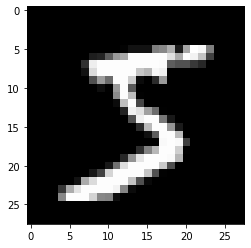

In [81]:
plt.imshow(X_train[0],cmap='gray')

In [0]:
total_epochs=60
batch_size=256
half_batch=int(batch_size/2)
no_of_batches=int(X_train.shape[0]/batch_size)
adam=Adam(lr=2e-4,beta_1=0.5)
noise_dim=100 # upsample into 784 dim

In [83]:
# Generator
# input noise 100 dim and output is 784 dim

generator=Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 784)             

In [84]:
#Discriminator
#Downsampling

discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
#discriminator.add(Dense(128))
#discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [85]:
#Gan
discriminator.trainable=False
ga_input=Input(shape=(noise_dim,))
generated_image=generator(ga_input)
ga_output=discriminator(generated_image)

model=Model(input=ga_input,output=ga_output)
model.compile(loss="binary_crossentropy",optimizer=adam)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [86]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 784)               1486352   
_________________________________________________________________
sequential_14 (Sequential)   (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [87]:
X_train=X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [0]:
def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch 1 discriminator loss 163.1821 generator loss 244.1048
epoch 2 discriminator loss 164.6519 generator loss 269.3382
epoch 3 discriminator loss 159.9663 generator loss 295.0429
epoch 4 discriminator loss 156.0407 generator loss 300.1805
epoch 5 discriminator loss 149.5807 generator loss 330.9766


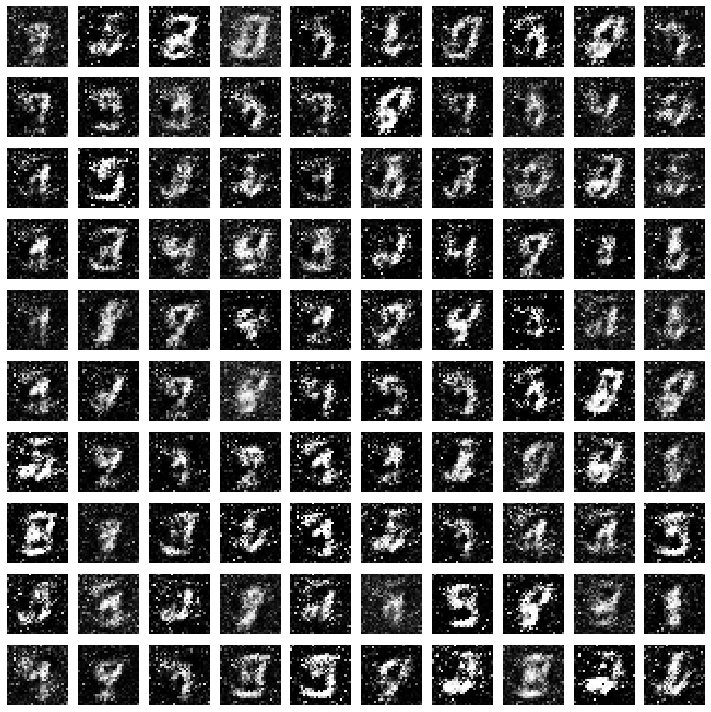

epoch 6 discriminator loss 145.3213 generator loss 346.7445
epoch 7 discriminator loss 145.9926 generator loss 337.5921
epoch 8 discriminator loss 144.4241 generator loss 340.4869
epoch 9 discriminator loss 149.8954 generator loss 318.8585
epoch 10 discriminator loss 158.6004 generator loss 299.2695


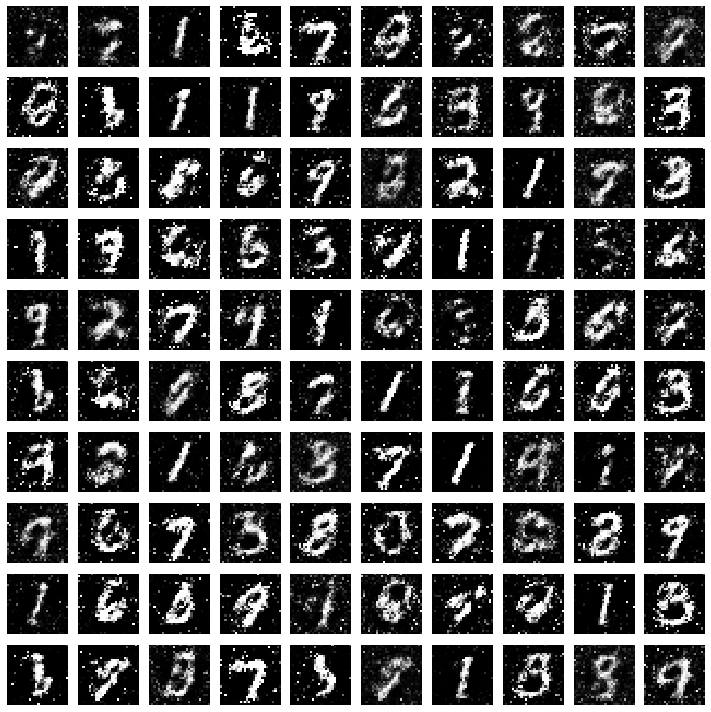

epoch 11 discriminator loss 163.9474 generator loss 272.3273
epoch 12 discriminator loss 163.2963 generator loss 270.0561
epoch 13 discriminator loss 163.6562 generator loss 268.7966
epoch 14 discriminator loss 163.4478 generator loss 266.8480
epoch 15 discriminator loss 164.1746 generator loss 267.8238


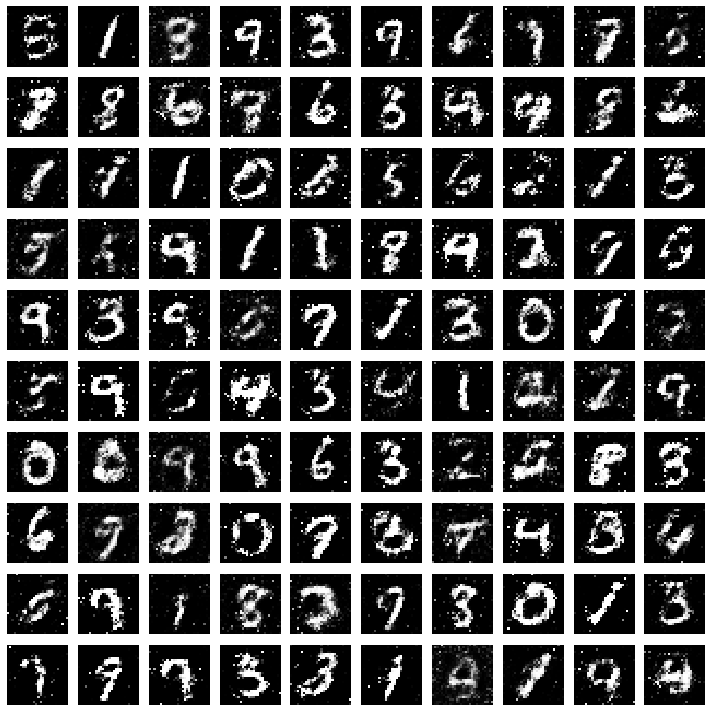

epoch 16 discriminator loss 163.6283 generator loss 266.8619
epoch 17 discriminator loss 164.2656 generator loss 265.4172
epoch 18 discriminator loss 164.5278 generator loss 264.1084
epoch 19 discriminator loss 165.5963 generator loss 263.0352
epoch 20 discriminator loss 166.1770 generator loss 261.6760


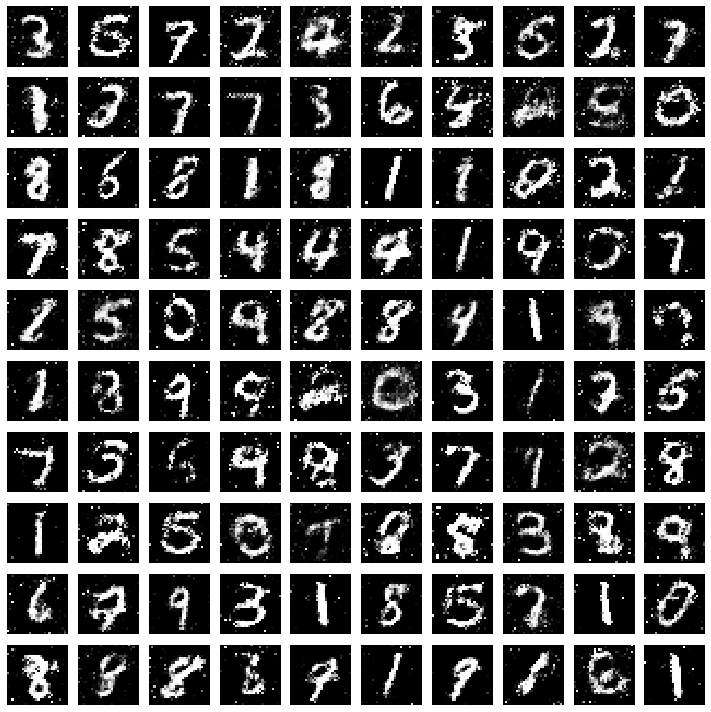

epoch 21 discriminator loss 167.2285 generator loss 258.3108
epoch 22 discriminator loss 168.0048 generator loss 257.2130
epoch 23 discriminator loss 168.0269 generator loss 255.9138
epoch 24 discriminator loss 168.2142 generator loss 256.3120
epoch 25 discriminator loss 168.7644 generator loss 255.3634


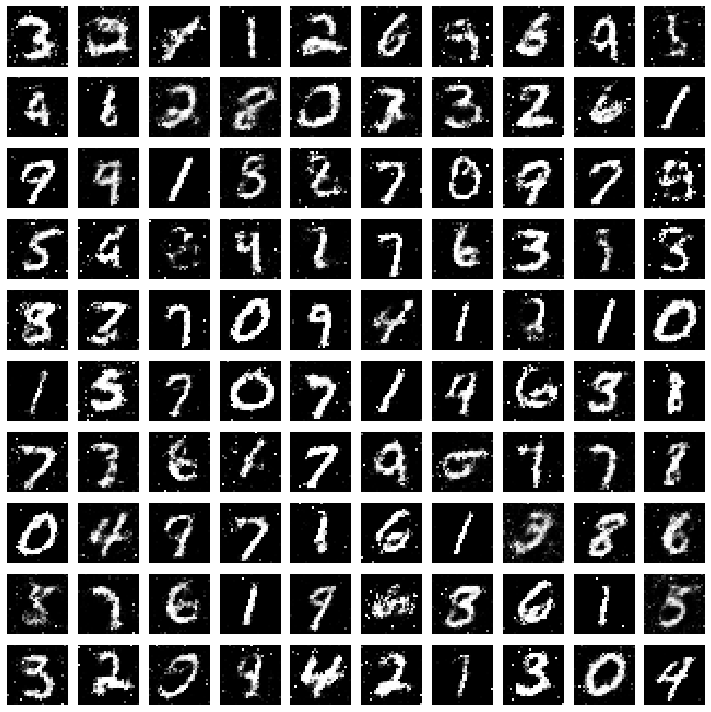

epoch 26 discriminator loss 169.2960 generator loss 254.4061
epoch 27 discriminator loss 169.2758 generator loss 256.5144
epoch 28 discriminator loss 169.6159 generator loss 255.6981
epoch 29 discriminator loss 169.3117 generator loss 255.1452
epoch 30 discriminator loss 169.6042 generator loss 254.1246


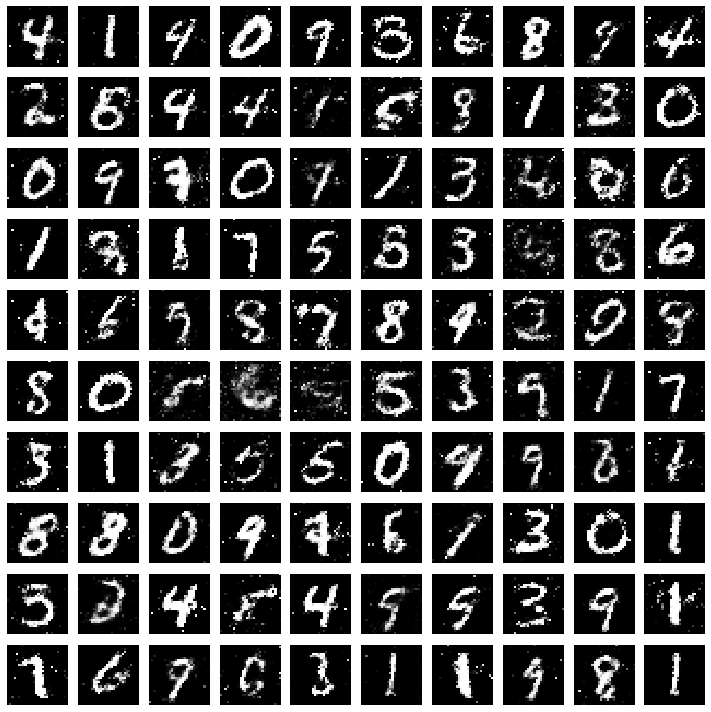

epoch 31 discriminator loss 169.5405 generator loss 254.9133
epoch 32 discriminator loss 170.1539 generator loss 253.6123
epoch 33 discriminator loss 169.7136 generator loss 254.3537
epoch 34 discriminator loss 169.6061 generator loss 253.8839
epoch 35 discriminator loss 169.5760 generator loss 254.0440


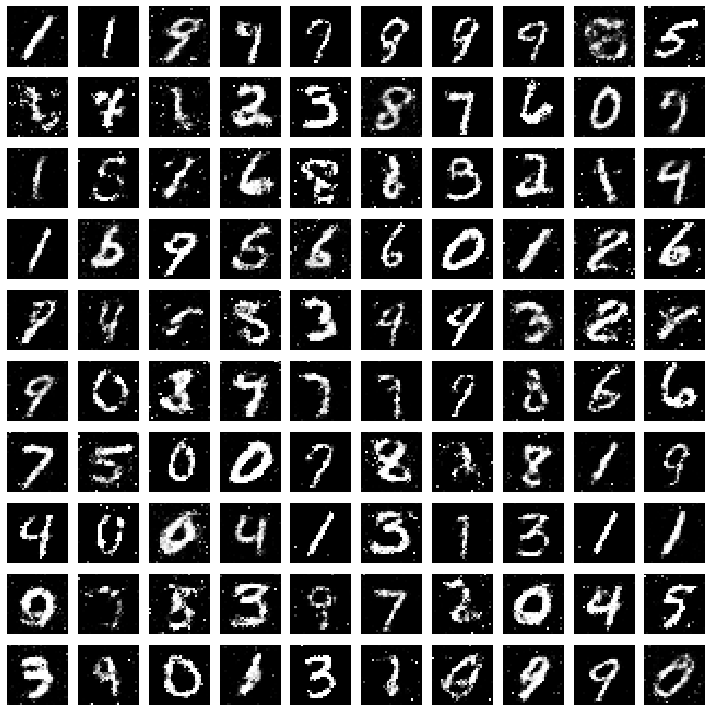

epoch 36 discriminator loss 169.5944 generator loss 253.9112
epoch 37 discriminator loss 169.5553 generator loss 254.3778
epoch 38 discriminator loss 170.0954 generator loss 252.3817
epoch 39 discriminator loss 169.5892 generator loss 252.8611
epoch 40 discriminator loss 169.7582 generator loss 253.7811


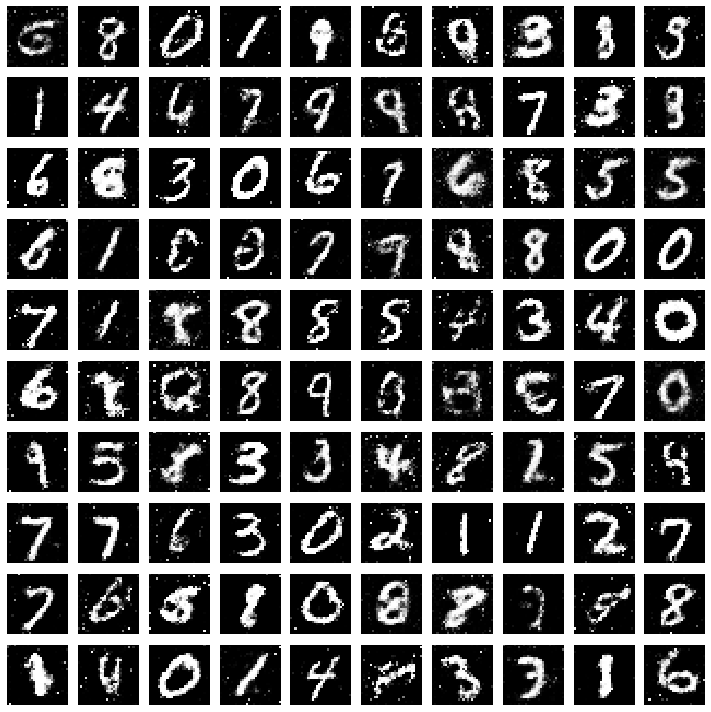

epoch 41 discriminator loss 169.9241 generator loss 253.2964
epoch 42 discriminator loss 169.9381 generator loss 253.6602
epoch 43 discriminator loss 170.2528 generator loss 253.5374
epoch 44 discriminator loss 170.0972 generator loss 251.5797
epoch 45 discriminator loss 169.9439 generator loss 254.0103


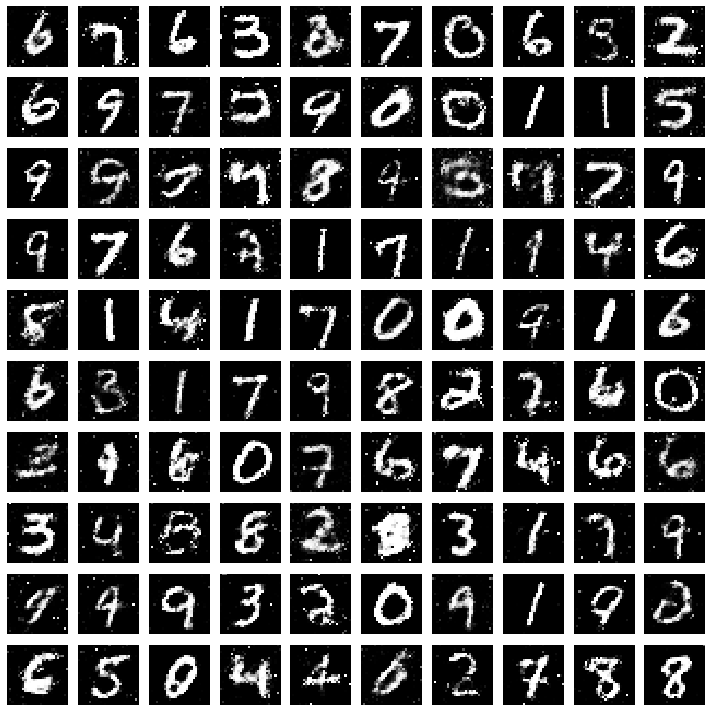

epoch 46 discriminator loss 170.2134 generator loss 252.4066
epoch 47 discriminator loss 170.6262 generator loss 251.2702
epoch 48 discriminator loss 170.4389 generator loss 252.5389
epoch 49 discriminator loss 170.5453 generator loss 251.3276
epoch 50 discriminator loss 170.5705 generator loss 251.3573


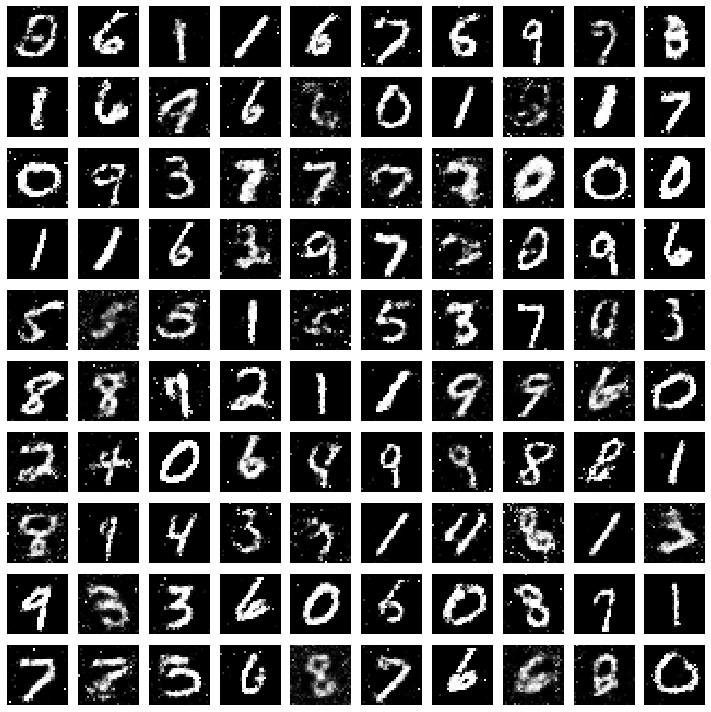

epoch 51 discriminator loss 170.9394 generator loss 250.9724
epoch 52 discriminator loss 170.6875 generator loss 251.1796
epoch 53 discriminator loss 170.9340 generator loss 251.3864
epoch 54 discriminator loss 170.9062 generator loss 250.9432
epoch 55 discriminator loss 170.8209 generator loss 249.7500


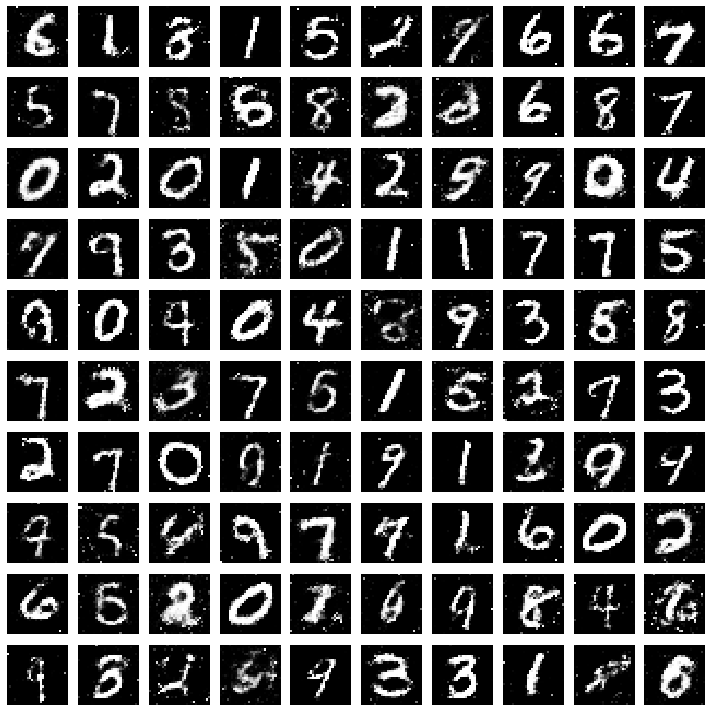

epoch 56 discriminator loss 170.8389 generator loss 250.7433
epoch 57 discriminator loss 171.1102 generator loss 250.7884
epoch 58 discriminator loss 170.8875 generator loss 251.0068
epoch 59 discriminator loss 170.9488 generator loss 249.8581
epoch 60 discriminator loss 171.1634 generator loss 250.9547


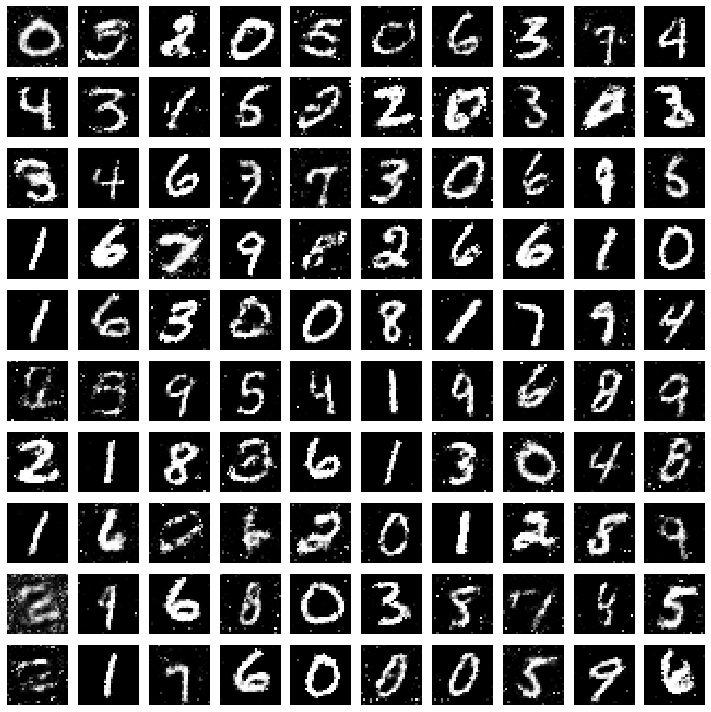

In [90]:
# training loop
# we cannot use the fit function directly
for epoch in range(total_epochs):
    epoch_d_loss=0.
    epoch_g_loss=0.
    for step in range(batch_size):
        # step 1 - discriminator
        # 50% real data + 50% fake data
    
        # real data
        idx=np.random.randint(0,X_train.shape[0],half_batch)
        real_imgs=X_train[idx]

    #fake data
        noise=np.random.normal(0,1,size=(half_batch,noise_dim))
        fake_imgs=generator.predict(noise)  # forward propagation

    # labels 
    # real y
        real_y=np.ones((half_batch,1))*0.9 #one sided label smoothing for dicriminator
        fake_y=np.zeros((half_batch,1))

    # train discriminator
        d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss=0.5*d_loss_real+0.5*d_loss_fake

        epoch_d_loss+=d_loss

    # train generator
        noise1=np.random.normal(0,1,size=(batch_size,noise_dim))
        ground_truth_y=np.ones((batch_size,1))
        g_loss=model.train_on_batch(noise1,ground_truth_y)
        epoch_g_loss+=g_loss
    print("epoch %d discriminator loss %.4f generator loss %.4f"%((epoch+1),epoch_d_loss,epoch_g_loss))
    if (epoch+1)%5==0:
    generator.save("model/generator{0}.h5".format(epoch+1))
    save_imgs(epoch)